In [71]:
import os, sys
sys.path.insert(0, os.path.abspath('..'))
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
import IESDS
import order_k
import BFPSNS
import Linear_programming
import support_enumeration as se

import nashpy as nash


## 1.

In [72]:
def demand_a(pi,pj):
    return (1/2) * np.max(1 - pi - pj, 0)

def demand_b(pi,pj):
    return np.max(1 - pi + (1/2) * pj, 0)

def profit_a(pi,pj,c=0):
    return pi * demand_a(pi, pj)

def profit_b(pi,pj,c=0):
    return pi * demand_b(pi, pj)

p0 = np.array([0.5,0.5])

Symmetric Nash price: p* ≈ 0.3333
Symmetric Nash price: p* ≈ 0.3333
Symmetric profit: π* ≈ 0.0556


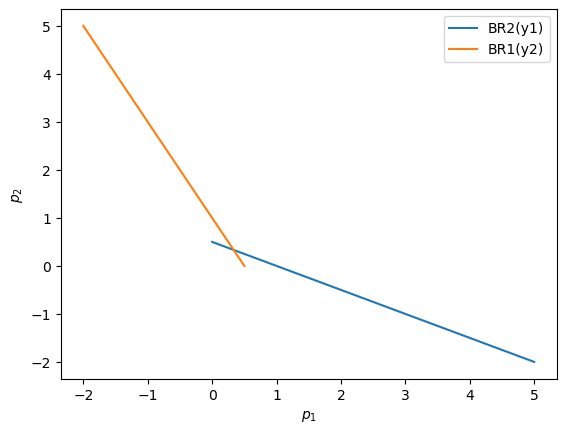

In [73]:
from scipy.optimize import fsolve
# NASH for demand function a
from scipy.optimize import minimize

def BR2_a(p1,c2=0): 
    f = lambda p2 : -profit_a(pi=p2, pj=p1, c=c2)
    res = minimize(f, p0[1])
    p2 = res.x[0]
    return p2
    
def BR1_a(p2,c1=0):
    f = lambda p1 : -profit_a(pi=p1, pj=p2, c=c1)
    res = minimize(f, p0[0])
    p1 = res.x[0]
    return p1

pp = np.linspace(0., 5., 200)
pp1_a = np.empty(pp.shape)
pp2_a = np.empty(pp.shape)
for i,p in enumerate(pp): 
    pp1_a[i] = BR1_a(p)
    pp2_a[i] = BR2_a(p)

plt.plot(pp, pp2_a, label=f'BR2(y1)')
plt.plot(pp1_a, pp, label=f'BR1(y2)')
plt.legend(); 
plt.xlabel('$p_1$');
plt.ylabel('$p_2$');

def eq1(p):
    return p - BR1_a(p)

def eq2(p):
    return p - BR2_a(p,c2=1)

# find p*
p_star1, = fsolve(eq1, 0.5)
p_star2, = fsolve(eq2, 0.5)
print(f"Symmetric Nash price: p* ≈ {p_star1:.4f}")
print(f"Symmetric Nash price: p* ≈ {p_star2:.4f}")
print(f"Symmetric profit: π* ≈ {profit_a(p_star1, p_star2):.4f}")

Symmetric Nash price: p* ≈ 0.6667
Symmetric Nash price: p* ≈ 0.6667
Symmetric profit: π* ≈ 0.4444


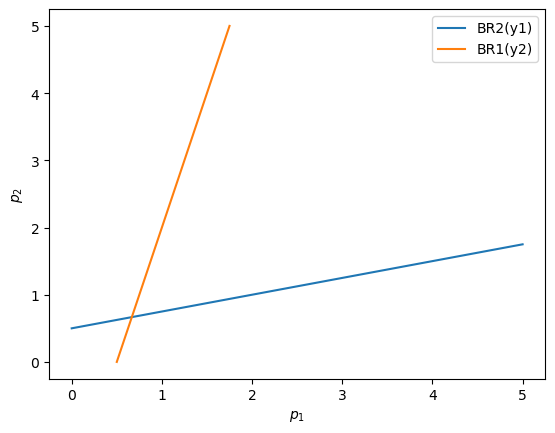

In [74]:
# Nash for demand function b
def BR2_b(p1,c2=0): 
    f = lambda p2 : -profit_b(pi=p2, pj=p1, c=c2)
    res = minimize(f, p0[1])
    p2 = res.x[0]
    return p2
def BR1_b(p2,c1=0):
    f = lambda p1 : -profit_b(pi=p1, pj=p2, c=c1)
    res = minimize(f, p0[0])
    p1 = res.x[0]
    return p1
pp1_b = np.empty(pp.shape)
pp2_b = np.empty(pp.shape)
for i,p in enumerate(pp): 
    pp1_b[i] = BR1_b(p)
    pp2_b[i] = BR2_b(p)

plt.plot(pp, pp2_b, label=f'BR2(y1)')
plt.plot(pp1_b, pp, label=f'BR1(y2)')
plt.legend();
plt.xlabel('$p_1$');
plt.ylabel('$p_2$');
def eq1_b(p):
    return p - BR1_b(p)
def eq2_b(p):
    return p - BR2_b(p)

# find p*
p_star1_b, = fsolve(eq1_b, 0.5)
p_star2_b, = fsolve(eq2_b, 0.5)
print(f"Symmetric Nash price: p* ≈ {p_star1_b:.4f}")
print(f"Symmetric Nash price: p* ≈ {p_star2_b:.4f}")
print(f"Symmetric profit: π* ≈ {profit_b(p_star1_b, p_star2_b):.4f}")

## 2.

In [75]:
def cartel_profit_a(x, c=0): 
    p1, p2 = x
    return profit_a(p1, p2, c) + profit_a(p2, p1, c)

f = lambda x : -cartel_profit_a(x)
res_a = minimize(f, p0)

print(res_a.x)

[0.25 0.25]


In [76]:
# cartel profit for demand function b
def cartel_profit_b(x, c=0): 
    p1, p2 = x
    return profit_b(p1, p2, c) + profit_b(p2, p1, c)
f = lambda x : -cartel_profit_b(x)
res_b = minimize(f, p0)
print(res_b.x)

[0.99999999 0.99999999]


## 3.

In [77]:
#Profit i samarbejdsstadiet
print(profit_a(0.25,0.25,c=0))

#Profit i nashstadiet
print(profit_a(0.3333,0.3333,c=0))

#Profit i afvigelse for demand function a
from scipy.optimize import minimize_scalar

p_c = 0.25

res_hat_a = minimize_scalar(
    lambda p: -profit_a(pi=p, pj=p_c, c=0),
    bounds=(0, 5),
    method='bounded'
)
print("Optimal price ved afvigelse:", res_hat_a.x)
pi_hat = profit_a(res_hat_a.x, pj=p_c, c=0)
pi_hat2 = profit_a(p_c, pj=res_hat_a.x, c=0)
print("Optimal pi ved afvigelse:", pi_hat)
print("Optimal pi ved afvigelse:", pi_hat2)

minimum_delta = (0.0703125-0.0625)/(0.0703125-0.05556)
print("Minimum delta for cooperation:", minimum_delta)

0.0625
0.05556111000000001
Optimal price ved afvigelse: 0.37499999999999956
Optimal pi ved afvigelse: 0.0703125
Optimal pi ved afvigelse: 0.046875000000000056
Minimum delta for cooperation: 0.5295712591086256


In [78]:
#Profit i samarbejdsstadiet
print(profit_b(0.99999999,0.99999999,c=0))

#Profit i nashstadiet
print(profit_b(0.6667,0.6667,c=0))

p_c = 1

# Calculate the minimum delta for demand function b
res_hat_b = minimize_scalar(
    lambda p: -profit_b(pi=p, pj=p_c, c=0),
    bounds=(0, 5),
    method='bounded'
)
print("Optimal price ved afvigelse (demand b):", res_hat_b.x)
pi_hat_b = profit_b(res_hat_b.x, pj=p_c, c=0)
pi_hat2_b = profit_b(p_c, pj=res_hat_b.x, c=0)
print("Optimal pi ved afvigelse (demand b):", pi_hat_b)
print("Optimal pi ved afvigelse (demand b):", pi_hat2_b)
minimum_delta_b = (0.5625-0.5)/(0.5625-0.444455554)
print("Minimum delta for cooperation (demand b):", minimum_delta_b)

0.4999999999999999
0.44445555499999995
Optimal price ved afvigelse (demand b): 0.7500000000000004
Optimal pi ved afvigelse (demand b): 0.5625
Optimal pi ved afvigelse (demand b): 0.3750000000000002
Minimum delta for cooperation (demand b): 0.5294615894084503


## 4.

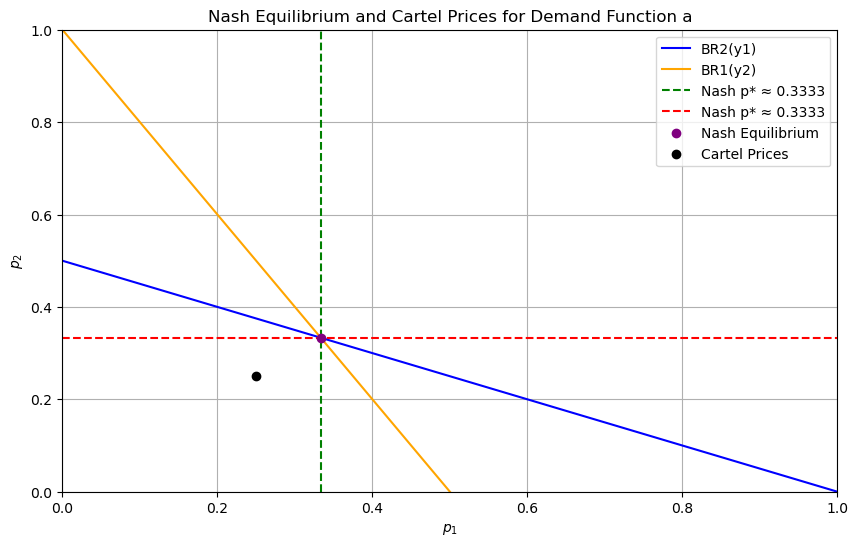

In [81]:
# plot nash equilibrium and cartel prices for deman function a
plt.figure(figsize=(10, 6))
plt.plot(pp, pp2_a, label='BR2(y1)', color='blue')
plt.plot(pp1_a, pp, label='BR1(y2)', color='orange')
plt.axvline(p_star1, color='green', linestyle='--', label=f'Nash p* ≈ {p_star1:.4f}')
plt.axhline(p_star2, color='red', linestyle='--', label=f'Nash p* ≈ {p_star2:.4f}')
plt.scatter(p_star1, p_star2, color='purple', label='Nash Equilibrium', zorder=5)
plt.scatter(res_a.x[0], res_a.x[1], color='black', label='Cartel Prices', zorder=5)
plt.title('Nash Equilibrium and Cartel Prices for Demand Function a')
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

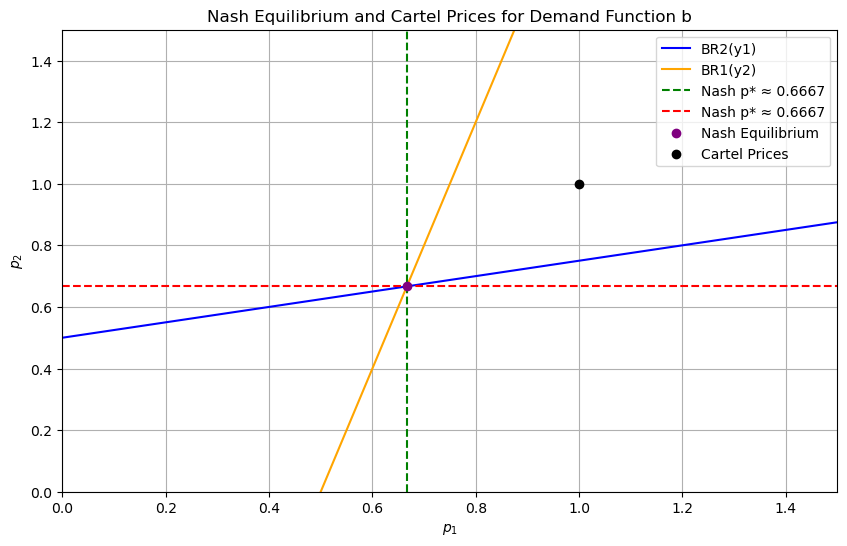

In [83]:
# plot nash equilibrium and cartel prices for deman function b
plt.figure(figsize=(10, 6))
plt.plot(pp, pp2_b, label='BR2(y1)', color='blue')
plt.plot(pp1_b, pp, label='BR1(y2)', color='orange')
plt.axvline(p_star1_b, color='green', linestyle='--', label=f'Nash p* ≈ {p_star1_b:.4f}')
plt.axhline(p_star2_b, color='red', linestyle='--', label=f'Nash p* ≈ {p_star2_b:.4f}')
plt.scatter(p_star1_b, p_star2_b, color='purple', label='Nash Equilibrium', zorder=5)
plt.scatter(res_b.x[0], res_b.x[1], color='black', label='Cartel Prices', zorder=5)
plt.title('Nash Equilibrium and Cartel Prices for Demand Function b')
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.legend()
plt.grid()
plt.show()

## 5.